# SSRO Experiment
This notebook shows you how to set and run the SSRO experiment.

The SSRO experiment is used to determine the threshold to discriminate measurments of a qubit.

The SSRO is performed with the execution of two circuits on the same qubit through the following sequence of operations:

    Circuit 1:
        1. Prepare the qubit in the ground state.

        2. Measure the state of the qubit.

    Circuit 2:
        1. Prepare the qubit in the excited state by sending a π-pulse to the qubit.

        2. Measure the state of the qubit.

In [ ]:
import json
import os

import numpy as np

import qililab as ql

os.environ["RUNCARDS"] = "./runcards"
os.environ["DATA"] = "./data"

## Select and connect to the platform

In [ ]:
platform = ql.build_platform(name="soprano_master_galadriel")
platform.connect()
platform.turn_on_instruments()
platform.initial_setup()

## Setup experiment

In [ ]:
qubit = 0  # Qubit we want to perform the experiment
parameter = (
    ql.typings.Parameter.LO_FREQUENCY
)  # Specify parameter if we want to perform the experiment while looping over some parameter
values = np.linspace(0, 100, 100)  # Specify the loop values if a parameter is specified

experiment = ql.experiment.SSRO(
    qubit=qubit,
    platform=platform,
    loop_parameter=parameter,
    loop_values=values,
    num_bins=4_000,
)

experiment.build_execution()
experiment.initial_setup()

## Run the experiment

In [ ]:
experiment.run(save_experiment=False)

## Post proccesing and visualitzation

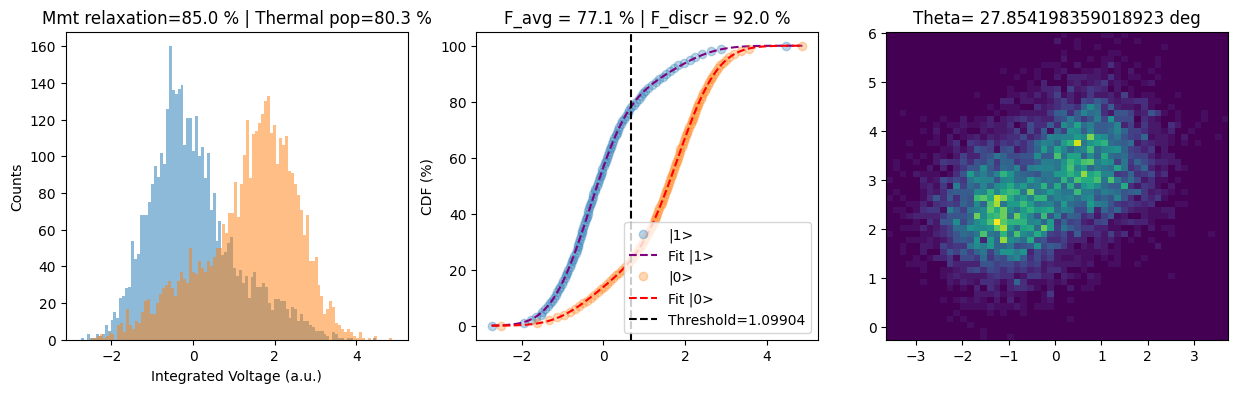

In [ ]:
_ = experiment.post_process_results()
_ = experiment.fit()

experiment.plot()